In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy.stats import binned_statistic

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn import svm

import collections
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict


import warnings

from pyspark.conf import SparkConf
from pyspark.context import SparkContext
from pyspark.sql import HiveContext
import json
from pyspark.ml.feature import HashingTF, IDF, Tokenizer
from pyspark.ml.feature import Word2Vec
from pyspark.ml.feature import Tokenizer, RegexTokenizer
from pyspark.sql.functions import col, udf
from pyspark.sql.types import IntegerType
from pyspark.ml.feature import StopWordsRemover
from pyspark.ml.feature import PCA
from pyspark.ml.linalg import Vectors
from pyspark.sql import SparkSession
from pyspark.ml.feature import Normalizer
from pyspark.ml.feature import StandardScaler
from pyspark.ml.feature import MinMaxScaler
from pyspark.ml.feature import Bucketizer
from pyspark.ml.feature import ChiSqSelector
from pyspark.ml.linalg import Vectors
from pyspark.sql.functions import count
from pyspark.sql.functions import countDistinct
from pyspark.sql.functions import approx_count_distinct
from pyspark.sql.functions import first, last
from pyspark.sql.functions import min, max
from pyspark.sql.functions import sum, count, avg, expr, mean
from pyspark.sql.functions import var_pop, stddev_pop
from pyspark.sql.functions import var_samp, stddev_samp
from pyspark.sql.functions import skewness, kurtosis

from pyspark.sql.functions import var_pop, stddev_pop
from pyspark.sql.functions import var_samp, stddev_samp

from pyspark.sql.functions import corr, covar_pop, covar_samp
from pyspark.sql.functions import collect_set, collect_list

from pyspark.sql.functions import col, to_date

import datetime

from pyspark.sql.window import Window
from pyspark.sql.functions import desc
from pyspark.sql.functions import max
from pyspark.sql.functions import sum

from pyspark.sql.functions import dense_rank, rank
from pyspark.sql.functions import col


from pyspark.sql.types import DataType
from pyspark.sql.types import NullType
from pyspark.sql.types import StringType
from pyspark.sql.types import BinaryType
from pyspark.sql.types import BooleanType
from pyspark.sql.types import DateType

from pyspark.sql.types import TimestampType
from pyspark.sql.types import DecimalType
from pyspark.sql.types import DoubleType
from pyspark.sql.types import FloatType
from pyspark.sql.types import ByteType
from pyspark.sql.types import IntegerType

from pyspark.sql.types import LongType
from pyspark.sql.types import ShortType
from pyspark.sql.types import ArrayType
from pyspark.sql.types import MapType
from pyspark.sql.types import StructField
from pyspark.sql.types import StructType

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import mlxtend as ml


import copy
warnings.filterwarnings("ignore")

In [2]:
csvFile = "./OLD_output.csv"

In [3]:
pandasDf = pd.read_csv(csvFile)

In [4]:
pandasDf.columns

Index(['Unnamed: 0', 'cleaning_product;', 'artif._sweetener', 'skin_care;',
       'baby_food;', 'bag;', 'baking_powder;', 'cleaning_product;.1', 'meat;',
       'berries;',
       ...
       'milk;', 'vinegar;', 'waffles;', 'condiment;.10', 'liquor;.8',
       'pastry;.7', 'liquor;.9', 'milk;.1', 'yogurt;', 'snack;.7'],
      dtype='object', length=170)

In [5]:
pandasDf.drop(inplace=True, axis=1, columns=['Unnamed: 0'])

In [6]:
pandasDf.columns

Index(['cleaning_product;', 'artif._sweetener', 'skin_care;', 'baby_food;',
       'bag;', 'baking_powder;', 'cleaning_product;.1', 'meat;', 'berries;',
       'misc_beverages;',
       ...
       'milk;', 'vinegar;', 'waffles;', 'condiment;.10', 'liquor;.8',
       'pastry;.7', 'liquor;.9', 'milk;.1', 'yogurt;', 'snack;.7'],
      dtype='object', length=169)

In [7]:
pandasDf.columns

Index(['cleaning_product;', 'artif._sweetener', 'skin_care;', 'baby_food;',
       'bag;', 'baking_powder;', 'cleaning_product;.1', 'meat;', 'berries;',
       'misc_beverages;',
       ...
       'milk;', 'vinegar;', 'waffles;', 'condiment;.10', 'liquor;.8',
       'pastry;.7', 'liquor;.9', 'milk;.1', 'yogurt;', 'snack;.7'],
      dtype='object', length=169)

In [8]:
cols = pandasDf.columns

In [9]:
cols_set = set()
for i, val in enumerate(cols):
    cols_set.add(val.split(';')[0])

In [10]:
len(cols_set)

77

In [11]:
cols_set


{'artif._sweetener',
 'baby_food',
 'bag',
 'baking_powder',
 'beer',
 'berries',
 'bottled_water',
 'butter',
 'butter_milk',
 'candles',
 'cereals',
 'cheese',
 'cleaning_product',
 'cocoa_drinks',
 'coffee',
 'condiment',
 'cookware',
 'curd',
 'dental_care',
 'dessert',
 'dishes',
 'domestic_eggs',
 'finished_products',
 'fish',
 'flour',
 'flowers',
 'frozen_food',
 'fruit',
 'gardening_supplies',
 'hair_spray',
 'honey',
 'hygiene_articles',
 'ice_cream',
 'instant_food_products',
 'jelly',
 'juice',
 'kitchen_utensil',
 'light_bulbs',
 'liquor',
 'mayonnaise',
 'meat',
 'milk',
 'misc_beverages',
 'newspapers',
 'oil',
 'organic_products',
 'packaged_fruit/vegetables',
 'paper_towels',
 'pasta',
 'pastry',
 'pet_care',
 'pet_food',
 'photo_or_film',
 'plants',
 'poultry',
 'preservation_products',
 'processed_meat',
 'rice',
 'roll_products',
 'rubbing_alcohol',
 'salt',
 'sanitation_item',
 'seasonal_products',
 'shopping_bags',
 'skin_care',
 'snack',
 'soda',
 'softener',
 's

In [12]:
pandasDf['items'] = ''

In [13]:
pandasDf.dtypes

cleaning_product;      bool
artif._sweetener       bool
skin_care;             bool
baby_food;             bool
bag;                   bool
                      ...  
liquor;.9              bool
milk;.1                bool
yogurt;                bool
snack;.7               bool
items                object
Length: 170, dtype: object

In [14]:
for i, row in pandasDf.iterrows():
    item_list = []
    for col in pandasDf.columns:
        if(row[col] == True):
            for c in cols_set:
                if (col.find(c) != -1):
                    item_list.append(c)
    pandasDf.at[i, 'items'] = item_list

In [15]:
pandasDf['items'].unique

<bound method Series.unique of 0                           [fruit, butter, soup, pastry]
1                                 [coffee, fruit, yogurt]
2                                                  [milk]
3           [cheese, processed_meat, meat, fruit, yogurt]
4                       [sweets, pastry, vegetable, milk]
                              ...                        
9830    [meat, butter, poultry, sweets, fruit, coffee,...
9831                                             [pastry]
9832    [butter, poultry, fruit, bag, domestic_eggs, d...
9833                  [beer, bottled_water, pastry, soda]
9834    [poultry, vegetable, bag, shopping_bags, fruit...
Name: items, Length: 9835, dtype: object>

In [16]:
for col in pandasDf.columns:
    if col != 'items':
        pandasDf[[col]]=pandasDf[[col]].astype('int')

In [17]:
pandasDf

,cleaning_product;,artif._sweetener,skin_care;,baby_food;,bag;,baking_powder;,cleaning_product;.1,meat;,berries;,misc_beverages;,...,vinegar;,waffles;,condiment;.10,liquor;.8,pastry;.7,liquor;.9,milk;.1,yogurt;,snack;.7,items
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[fruit, butter, soup, pastry]"
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,"[coffee, fruit, yogurt]"
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,[milk]
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,"[cheese, processed_meat, meat, fruit, yogurt]"
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,"[sweets, pastry, vegetable, milk]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,"[meat, butter, poultry, sweets, fruit, coffee,..."
9831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,[pastry]
9832,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,"[butter, poultry, fruit, bag, domestic_eggs, d..."
9833,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[beer, bottled_water, pastry, soda]"


In [18]:
for i, row in pandasDf.iterrows():
    a = []
    if not row['items']:
        print('list is empty')

In [19]:
itemsDf = pandasDf[['items']].copy()

In [20]:
items =  pandasDf.drop(['items'], axis=1)

In [21]:
items

,cleaning_product;,artif._sweetener,skin_care;,baby_food;,bag;,baking_powder;,cleaning_product;.1,meat;,berries;,misc_beverages;,...,milk;,vinegar;,waffles;,condiment;.10,liquor;.8,pastry;.7,liquor;.9,milk;.1,yogurt;,snack;.7
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
9831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9832,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9833,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
frequent_itemsets = apriori(items, min_support=0.01, use_colnames=True)

In [23]:
rules = association_rules(frequent_itemsets, metric="lift")
rules.sort_values('confidence', ascending = False, inplace = True)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
438,"(fruit;.1, vegetable;.6)",(vegetable;.4),0.017692,0.193493,0.010371,0.586207,3.029608,0.006948,1.949059
509,"(fruit;.5, vegetable;.6)",(vegetable;.4),0.021047,0.193493,0.012303,0.584541,3.020999,0.008231,1.941244
455,"(curd;, yogurt;)",(milk;.1),0.017285,0.255516,0.010066,0.582353,2.279125,0.005649,1.782567
432,"(butter;, vegetable;.4)",(milk;.1),0.020031,0.255516,0.011490,0.573604,2.244885,0.006371,1.745992
587,"(fruit;.5, vegetable;.6)",(milk;.1),0.021047,0.255516,0.011998,0.570048,2.230969,0.006620,1.731553
594,"(yogurt;, vegetable;.6)",(milk;.1),0.025826,0.255516,0.014540,0.562992,2.203354,0.007941,1.703594
462,"(domestic_eggs;, vegetable;.4)",(milk;.1),0.022267,0.255516,0.012303,0.552511,2.162336,0.006613,1.663694
612,"(condiment;.10, yogurt;)",(milk;.1),0.020742,0.255516,0.010880,0.524510,2.052747,0.005580,1.565719
570,"(pastry;.5, vegetable;.6)",(milk;.1),0.024301,0.255516,0.012710,0.523013,2.046888,0.006500,1.560804
479,"(fruit;.4, vegetable;.4)",(milk;.1),0.026131,0.255516,0.013523,0.517510,2.025351,0.006846,1.543003


In [24]:
cols_set

{'artif._sweetener',
 'baby_food',
 'bag',
 'baking_powder',
 'beer',
 'berries',
 'bottled_water',
 'butter',
 'butter_milk',
 'candles',
 'cereals',
 'cheese',
 'cleaning_product',
 'cocoa_drinks',
 'coffee',
 'condiment',
 'cookware',
 'curd',
 'dental_care',
 'dessert',
 'dishes',
 'domestic_eggs',
 'finished_products',
 'fish',
 'flour',
 'flowers',
 'frozen_food',
 'fruit',
 'gardening_supplies',
 'hair_spray',
 'honey',
 'hygiene_articles',
 'ice_cream',
 'instant_food_products',
 'jelly',
 'juice',
 'kitchen_utensil',
 'light_bulbs',
 'liquor',
 'mayonnaise',
 'meat',
 'milk',
 'misc_beverages',
 'newspapers',
 'oil',
 'organic_products',
 'packaged_fruit/vegetables',
 'paper_towels',
 'pasta',
 'pastry',
 'pet_care',
 'pet_food',
 'photo_or_film',
 'plants',
 'poultry',
 'preservation_products',
 'processed_meat',
 'rice',
 'roll_products',
 'rubbing_alcohol',
 'salt',
 'sanitation_item',
 'seasonal_products',
 'shopping_bags',
 'skin_care',
 'snack',
 'soda',
 'softener',
 's

In [25]:
pandasDf

,cleaning_product;,artif._sweetener,skin_care;,baby_food;,bag;,baking_powder;,cleaning_product;.1,meat;,berries;,misc_beverages;,...,vinegar;,waffles;,condiment;.10,liquor;.8,pastry;.7,liquor;.9,milk;.1,yogurt;,snack;.7,items
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[fruit, butter, soup, pastry]"
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,"[coffee, fruit, yogurt]"
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,[milk]
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,"[cheese, processed_meat, meat, fruit, yogurt]"
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,"[sweets, pastry, vegetable, milk]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,"[meat, butter, poultry, sweets, fruit, coffee,..."
9831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,[pastry]
9832,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,"[butter, poultry, fruit, bag, domestic_eggs, d..."
9833,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[beer, bottled_water, pastry, soda]"


In [26]:
pandasDf2 = pd.DataFrame(columns = cols_set, index=range(9835)) 
for col in pandasDf2.columns:
    pandasDf2[[col]]=0
    
for i, row in pandasDf.iterrows():
    item_list = []
    for c in row['items']:
        pandasDf2.at[i, c] = 1

In [27]:
pandasDf2

,vegetable,softener,butter_milk,snack,artif._sweetener,fish,photo_or_film,juice,waffles,liquor,...,organic_products,berries,jelly,ice_cream,packaged_fruit/vegetables,instant_food_products,newspapers,roll_products,candles,pasta
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9832,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9833,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
pandasDf2

,vegetable,softener,butter_milk,snack,artif._sweetener,fish,photo_or_film,juice,waffles,liquor,...,organic_products,berries,jelly,ice_cream,packaged_fruit/vegetables,instant_food_products,newspapers,roll_products,candles,pasta
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9832,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9833,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
frequent_itemsets = apriori(pandasDf2, min_support=0.01, use_colnames=True)

In [30]:
rules = association_rules(frequent_itemsets, metric="lift")


In [31]:
rules.sort_values('confidence', ascending = True, inplace = True)

In [32]:
con = rules['confidence'] >= .50

In [33]:
unqiue_items = rules[con]['consequents'].unique()

In [34]:
target_set = set()
for i, val in enumerate(unqiue_items):
    for j, val2 in enumerate(val):
        target_set.add(val2)

In [35]:
target_set

{'bag',
 'butter',
 'condiment',
 'fruit',
 'meat',
 'milk',
 'pastry',
 'processed_meat',
 'shopping_bags',
 'vegetable'}

In [36]:
feature_set = set()

In [37]:
for i, val in enumerate(pandasDf2.columns):
    if val not in target_set:
        feature_set.add(val)

In [38]:
filtered_features_by_correlation = {'feature_set' : feature_set}

In [39]:
random_forest = RandomForestClassifier(n_estimators=20)

In [40]:
naive_bayes = GaussianNB()

In [41]:
logistic_regression = LogisticRegression()

In [42]:
supervised = {
#     naive_bayes.__class__.__name__ : naive_bayes,
    random_forest.__class__.__name__ : random_forest,
#     logistic_regression.__class__.__name__ : logistic_regression,
}

In [43]:
df_with_out_target_features = pandasDf2[feature_set]

In [44]:
df_target = pandasDf2[target_set]

In [45]:

X_train, X_test, y_train, y_test = train_test_split(df_with_out_target_features, df_target,test_size=.5)


In [46]:
y_train

,meat,fruit,vegetable,bag,milk,pastry,butter,processed_meat,condiment,shopping_bags
6090,1,0,0,0,1,1,0,0,1,0
4777,0,1,0,1,0,1,1,0,0,1
5637,0,0,0,0,0,1,0,0,0,0
6469,0,0,0,0,0,1,0,0,0,0
5220,1,0,0,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
2190,0,0,0,0,0,0,0,0,0,0
1742,0,0,1,0,0,1,0,0,1,0
1066,0,1,1,0,1,0,1,0,0,0
3151,1,0,0,0,0,1,0,1,0,0


In [47]:
y_test

,meat,fruit,vegetable,bag,milk,pastry,butter,processed_meat,condiment,shopping_bags
9827,1,1,1,0,1,1,0,1,0,0
9533,0,0,0,1,1,0,0,0,0,1
5470,1,0,0,1,0,1,0,1,0,1
8489,0,1,1,0,1,1,0,0,1,0
9646,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
4618,0,0,0,0,0,1,0,0,0,0
6172,1,0,1,0,0,0,0,1,1,0
3117,1,0,0,0,1,0,0,1,0,0
6816,0,0,1,0,0,0,1,0,0,0


In [48]:
def create_confustion_matrix_and_score(correlation_name, model_name, model_to_test, X_test, y_test, filtered_features, version):
    score = model_to_test.score(X_test, y_test)
    y_predicted = model_to_test.predict(X_test)
    
    cm = confusion_matrix(y_test.values.argmax(axis=1), y_predicted.argmax(axis=1))
    
    accuray_score_data = accuracy_score(y_test, y_predicted)
    classification_report_data = classification_report(y_test, y_predicted)
    recall_score_data = recall_score(y_test, y_predicted, average=None)
    percision_score_data = precision_score(y_test, y_predicted, average=None)
    f1_score_data = f1_score(y_test, y_predicted, average=None)
    roc_auc_score_data = roc_auc_score(y_test, y_predicted, average=None)
    
    figure = plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True)
    title =  "VERSION: " +version
    title += "\nModel used: " 
    title += model_to_test.__class__.__name__
    title += "\nScore: "
    title += str(roc_auc_score_data)
    title += "\nCorelation Name : "
    title += correlation_name
    title += "\nFiltered Features Used: "
    title += str(filtered_features)
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    file_name = 'version_'+version+'confusion_matrix_'+str(model_to_test.__class__.__name__)+"_correlation_name_"+correlation_name+".jpg"
    figure.savefig(file_name)
    return {
        'cm' : cm,
        'title' : title,
        'file_name' : file_name,
        'model_name' : model_name,
        'correlation_name' : correlation_name,
        'model' : model_to_test,
        'score' : score,
        'accuray_score_data' : accuray_score_data,
        'classification_report_data' : classification_report_data,
        'recall_score_data' : recall_score_data,
        'percision_score_data' : percision_score_data,
        'f1_score_data' : f1_score_data,
        'roc_auc_score_data' : roc_auc_score_data
    } 



In [49]:
def test_models_by_feature_list(correlation_name,
                                list_of_filtered_features,
                                model_name,
                                model_to_test,
                                X_train,
                                X_test,
                                y_train,
                                y_test):
    version = '1'
    model_to_test.fit(X_train, y_train)
    training_score = cross_val_score(model_to_test, X_train, y_train, cv=5)
    data = create_confustion_matrix_and_score(correlation_name, model_name, model_to_test, X_test, y_test, list_of_filtered_features, version)
    data['training_score'] = training_score
    model_pred = cross_val_predict(model_to_test, X_train, y_train, cv=5)
    roc_auc_score_corss_validation = roc_auc_score(y_train, model_pred)
    data['roc_auc_score_corss_validation'] = roc_auc_score_corss_validation
#     data['roc_curve_data'] = roc_curve(y_train, model_pred)
    return data

In [50]:
def test_data(data_frame):
    
    results  = []

    for correlation_name, list_of_filtered_features in filtered_features_by_correlation.items():

        df_with_high_correlated_features = data_frame[list_of_filtered_features]

        df_target = pandasDf2[target_set]

        X_train, X_test, y_train, y_test = train_test_split(df_with_high_correlated_features, df_target,test_size=.2)

        for model_name, model_to_test in models_to_test.items():
            res = test_models_by_feature_list(correlation_name,
                                              list_of_filtered_features,
                                              model_name,
                                              model_to_test,
                                              X_train,
                                              X_test,
                                              y_train,
                                              y_test)
            results.append(res)
        plt.show()
    return results


In [51]:
def graph_roc_curve_multiple(data):
    fpr, tpr, thresold = data['roc_auc_score_corss_validation']
    plt.title('ROC Curve \n 2 Classifiers', fontsize=18)
    plt.plot(fpr, tpr, label=data['model_name']+'_'+data['correlation_name']+'{:.4f}'.format(data['roc_auc_score_data']))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()



In [52]:

def create_roc_cruve(results):    
    plt.figure(figsize=(16,8))
    for i, d in enumerate(results):
        graph_roc_curve_multiple(d)
    plt.show()

In [53]:
def print_result(d):
    CM = d['cm']
    TP = CM[0][0]
    FN = CM[0][1]
    FP = CM[1][0]
    TN = CM[1][1]

    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    # Specificity or true negative rate
    TNR = TN/(TN+FP) 
    # Precision or positive predictive value
    PPV = TP/(TP+FP)
    # Negative predictive value
    NPV = TN/(TN+FN)
    # Fall out or false positive rate
    FPR = FP/(FP+TN)
    # False negative rate
    FNR = FN/(TP+FN)
    # False discovery rate
    FDR = FP/(TP+FP)
    
    model_and_feature_used = 'Model and Feature used: '+ d['title'] 
    TN = "TN: " + str( np.round(TN, 2) )
    FN = "FN: " + str( np.round(FN, 2) )
    TP = "TP: " + str( np.round(TP, 2) )
    FP = "FP: " + str( np.round(FP, 2) )
    TPR = "TPR: " + str( np.round(TPR, 2) )
    TNR = "TNR: " + str( np.round(TNR, 2) )
    PPV = "PPV: " + str( np.round(PPV, 2) )
    NPV = "NPV: " + str( np.round(NPV, 2) )
    FPR = "FPR: " + str( np.round(FPR, 2) )
    FNR = "FNR: " + str( np.round(FNR, 2) )
    FDR = "FDR: " + str( np.round(FDR, 2) )
    Recall_Score = 'Recall Score: ' + str(d['recall_score_data'])
    Precision_Score = 'Precision Score: ' + str(d['percision_score_data']) 
    F1_Score = 'F1 Score: ' + str(d['f1_score_data'])
    Accuracy_Score = 'Accuracy Score: ' + str(d['accuray_score_data']) 



    line =  TN +', '+ FN +', '+ TP +', '+ FP +', '+ TPR +', '+ TNR +', '+ PPV +', '+ NPV +', '+ FPR +', '+ FNR +', '+ FDR +', '+ Recall_Score +', '+ Precision_Score +', '+ F1_Score +', '+ Accuracy_Score

    print('---' * 10)
    print( model_and_feature_used )
    print( TN )
    print( FN )
    print( TP )
    print( FP )
    print( TPR )
    print( TNR )
    print( PPV )
    print( NPV )
    print( FPR )
    print( FNR )
    print( FDR )
    print( Recall_Score )
    print( Precision_Score )
    print( F1_Score )
    print( Accuracy_Score )
    print(line)
    print('---' * 10)



In [54]:
def print_all(results):
    for i, d in enumerate(results):
        print_result(d)

In [55]:
def show_all_confusion_matrix(results):
    stack_results = copy.deepcopy(results)
    fig, ax = plt.subplots(figsize=(300,300))
    
    sns.heatmap(results[0]['cm'], ax=ax, annot=True, cmap=plt.cm.copper, square=True, linewidths=0.1, annot_kws={"size":300}) 
    ax.set_xticklabels(['', ''], fontsize=300, rotation=90)
    ax.set_yticklabels(['', ''], fontsize=300, rotation=360)

    plt.show()



In [56]:
def determine_max_correlation(cm1, cm1Index , cm2, cm2Index):

    correct_credible_transactions_cm1 = cm1[0][0]
    incorrect_fraudulent_transactions_cm1 = cm1[0][1]
    incorrect_credible_transactions_cm1 = cm1[1][0]
    correct_fraudulent_transactions_cm1 = cm1[1][1]
    
    correct_credible_transactions_cm2 = cm2[0][0]
    incorrect_fraudulent_transactions_cm2 = cm2[0][1]
    incorrect_credible_transactions_cm2 = cm2[1][0]
    correct_fraudulent_transactions_cm2 = cm2[1][1]
    
#     Misclassifying fradulent transactions has the highest bussiness cost
    if(incorrect_fraudulent_transactions_cm1 > incorrect_fraudulent_transactions_cm2):
        return cm2Index
    elif(incorrect_fraudulent_transactions_cm1 < incorrect_fraudulent_transactions_cm2):
        return cm1Index

#     Checking count for in correct credible transactions
    if(incorrect_credible_transactions_cm1 > incorrect_credible_transactions_cm2):
        return cm2Index
    elif(incorrect_credible_transactions_cm1 < incorrect_credible_transactions_cm2):
        return cm1Index
    
#  Who has the most correct credible transactions
    if(correct_credible_transactions_cm1 > correct_credible_transactions_cm2):
        return cm1Index
    elif(correct_credible_transactions_cm1 < correct_credible_transactions_cm2):
        return cm2Index
    
    if(correct_fraudulent_transactions_cm1 > correct_fraudulent_transactions_cm2):
        return cm1Index
    elif(correct_fraudulent_transactions_cm1 < correct_fraudulent_transactions_cm2):
        return cm2Index
    
    return cm2Index

In [57]:

def get_best_result(res):
    maxResultIndex = 0
    initCm = res[0]['cm']
    for i, r in enumerate(res):
        maxResultIndex = determine_max_correlation(res[maxResultIndex]['cm'], maxResultIndex, r['cm'], i)    
    print("MAX_RESULT_INDEX: "+ str(maxResultIndex))
    return res[maxResultIndex]


# In[ ]:

In [58]:
models_to_test = supervised

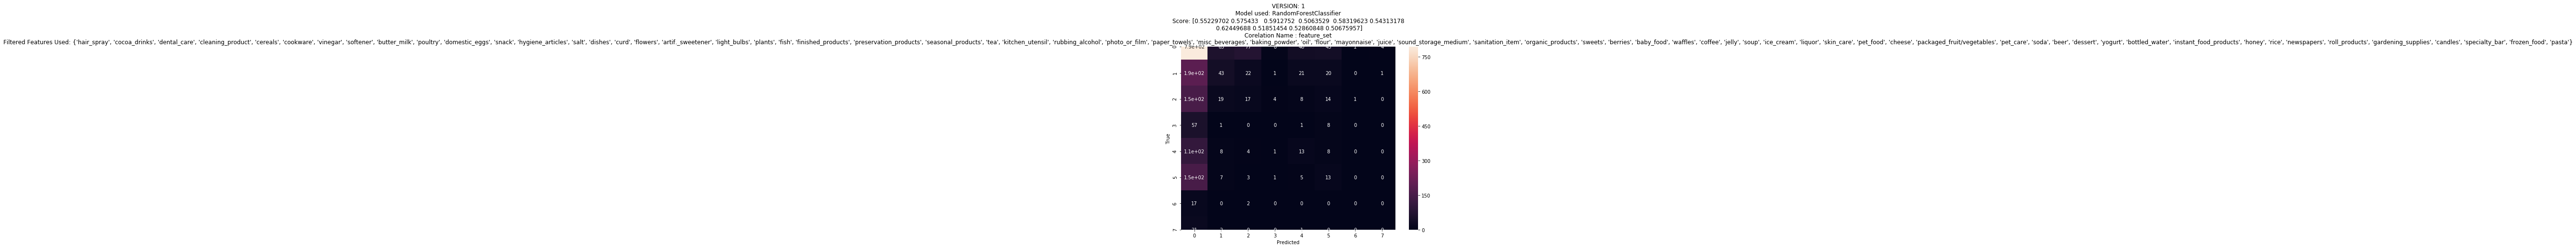

In [59]:
version = "1"

results = test_data(pandasDf2)

In [60]:
show_all_confusion_matrix(results)

In [61]:
print_all(results)

------------------------------
Model and Feature used: VERSION: 1
Model used: RandomForestClassifier
Score: [0.55229702 0.575433   0.5912752  0.5063529  0.58319623 0.54313178
 0.62449688 0.51851454 0.52860848 0.50675957]
Corelation Name : feature_set
Filtered Features Used: {'hair_spray', 'cocoa_drinks', 'dental_care', 'cleaning_product', 'cereals', 'cookware', 'vinegar', 'softener', 'butter_milk', 'poultry', 'domestic_eggs', 'snack', 'hygiene_articles', 'salt', 'dishes', 'curd', 'flowers', 'artif._sweetener', 'light_bulbs', 'plants', 'fish', 'finished_products', 'preservation_products', 'seasonal_products', 'tea', 'kitchen_utensil', 'rubbing_alcohol', 'photo_or_film', 'paper_towels', 'misc_beverages', 'baking_powder', 'oil', 'flour', 'mayonnaise', 'juice', 'sound_storage_medium', 'sanitation_item', 'organic_products', 'sweets', 'berries', 'baby_food', 'waffles', 'coffee', 'jelly', 'soup', 'ice_cream', 'liquor', 'skin_care', 'pet_food', 'cheese', 'packaged_fruit/vegetables', 'pet_care'